In [27]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
%matplotlib inline
import matplotlib.pyplot as plt
plt.ion()

In [28]:
(xr, yr), (xs, ys) = mnist.load_data()

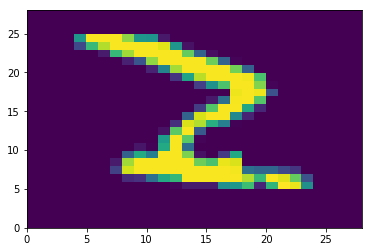

In [29]:
plt.pcolor(xr[0])

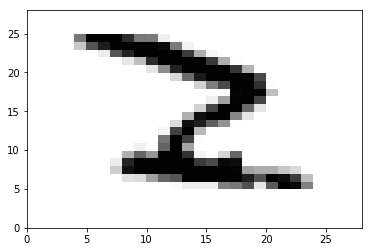

In [30]:
plt.pcolormesh(xr[0], cmap = plt.cm.gray_r)

In [31]:
n_cls = 10
yr = np_utils.to_categorical(yr, n_cls)
ys= np_utils.to_categorical(ys, n_cls)

In [32]:
xr = xr.reshape(np.shape(xr)[0], 28*28)
xs = xs.reshape(np.shape(xs)[0], 28*28)
xr = xr.astype('float32')
xs = xs.astype('float32')
xr /= 255.
xs /= 255.

In [33]:
model = Sequential()

In [34]:
model.add(Dense(128, input_shape=(28*28,), activation = 'sigmoid', name='fc_layer'))
model.summary()
print 128*28*28 + 128

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc_layer (Dense)             (None, 128)               100480    
Total params: 100,480.0
Trainable params: 100,480
Non-trainable params: 0.0
_________________________________________________________________
100480


In [35]:
model.add(Activation('sigmoid', name = 'act_layer1'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc_layer (Dense)             (None, 128)               100480    
_________________________________________________________________
act_layer1 (Activation)      (None, 128)               0         
Total params: 100,480.0
Trainable params: 100,480.0
Non-trainable params: 0.0
_________________________________________________________________


In [36]:
import traceback
class A:
    def __init__(self, a):
        self.a = a
    
    def outputName(self):
        print type(self.__class__.__name__)
        filename, codeline, funcName, text = traceback.extract_stack()[-1]
        print "filename = ", filename
        print "classname = ", self.__class__.__name__
        print ""

In [37]:
%time a = A(3)
%time a.outputName()

CPU times: user 10 µs, sys: 6 µs, total: 16 µs
Wall time: 23.8 µs
<type 'str'>
filename =  <ipython-input-36-016b29861f47>
classname =  A

CPU times: user 1.43 ms, sys: 957 µs, total: 2.39 ms
Wall time: 1.64 ms


In [38]:
model.summary()
from IPython.display import SVG, display, Image
from keras.utils.vis_utils import plot_model
plot_model(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc_layer (Dense)             (None, 128)               100480    
_________________________________________________________________
act_layer1 (Activation)      (None, 128)               0         
Total params: 100,480.0
Trainable params: 100,480.0
Non-trainable params: 0.0
_________________________________________________________________


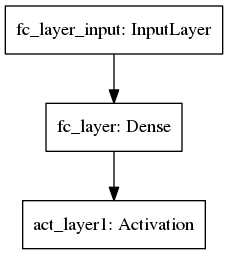

In [39]:
Image('model.png')

In [40]:
import keras

In [41]:
from sklearn.utils import class_weight

In [50]:
y_cls = np.argmax(yr, axis = 1)
print y_cls
print np.unique(y_cls)
cls_weight = class_weight.compute_class_weight('balanced', np.unique(y_cls), y_cls)
print cls_weight
print list(y_cls).count(0)*cls_weight[0], list(y_cls).count(1)*cls_weight[1]

[5 0 4 ..., 5 6 8]
[0 1 2 3 4 5 6 7 8 9]
[ 1.01300017  0.88994364  1.00704935  0.97863318  1.02704553  1.10680686
  1.01385603  0.95770152  1.02546573  1.00857287]
6000.0 6000.0
10.0280748719


In [59]:
print model.layers
print model.get_layer('fc_layer')

[<keras.layers.core.Dense object at 0x7f0c2c4095d0>, <keras.layers.core.Activation object at 0x7f0c2c409590>]
